# Question
1. Use RAND to generate synthetic dataset
2. Choose any ANN dataset kaggle or uci machine learning repository

For both, 
1. Implement step-by-step for each with a standard set of weights etc
2. Show tabular representation of hyperparameters as they are tuned at the end. Use CSVLogger code from earlier

Note: <br>
Decide activation functions as well, and define the neural network architecture <br>
Define weights etc, create sub functions for forward and backward propagations <br>
Set a number of iterations and run through the architecture accordingly <br>

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo 
import sys

#### ANN Definition

In [2]:
class ANN2():
    # Creating an object will initialize the network
    def __init__(self, n_input_cols, n_hidden, n_output_cols):
        self.network = list()
        hidden_layer = [{'weights':[np.random.uniform(low=-0.1, high=0.1) for _ in range(n_input_cols + 1)]} for _ in range(n_hidden)]
        self.network.append(hidden_layer)
        output_layer = [{'weights':[np.random.uniform(low=-1, high=0.1) for _ in range(n_hidden + 1)]} for _ in range(n_output_cols)]
        self.network.append(output_layer)
        self.errors = []


    def forward_propagate(self, row):
        def activate(weights, inputs):
            activation = weights[-1]
            for i in range(len(weights) - 1):
                activation += weights[i] * inputs[i]
            return activation

        def neuron_transfer(activation):
            return 1/(1 + np.exp(-activation))
        
        inputs = row
        for layer in self.network:
            new_input = []
            for neuron in layer:
                activation = activate(neuron['weights'], inputs)
                neuron['output'] = neuron_transfer(activation)
                new_input.append(neuron['output'])
            inputs = new_input
        return inputs
    

    def backward_propagate(self, expected): # Expected is basically the actual output you are supposed to get
        def transfer_derivative(output):
            return output * (1 - output)
        
        for i in reversed(range(len(self.network))):
            layer = self.network[i]
            errors = []
            if i != len(self.network) - 1:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.network[i + 1]:
                        error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(neuron['output'] - expected[j])
            for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
        

    # Update network weights with error
    def update_weights(self, row, l_rate):
        for i in range(len(self.network)):
            inputs = row[:-1]
            if i != 0:
                inputs = [neuron['output'] for neuron in self.network[i - 1]]
            for neuron in self.network[i]:
                for j in range(len(inputs)):
                    neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] -= l_rate * neuron['delta']

    
    def train_network(self, x_train, y_train, l_rate, n_epoch):
        for epoch in range(n_epoch):
            sum_error = 0
            for i in range(len(x_train)):
                row = x_train[i]
                expected = [y_train[i]]
                outputs = [0 if elem < 0.5 else 1 for elem in self.forward_propagate(row)]
                sum_error += sum([(expected[j] - outputs[j])**2 for j in range(len(expected))])
                self.backward_propagate(expected)
                self.update_weights(row, l_rate)
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            self.errors.append(sum_error)


    def predict(self, x_test):
        predictions = []
        for i in range(len(x_test)):
            predicted = [0 if elem < 0.5 else 1 for elem in self.forward_propagate(x_test[i])][0]
            predictions.append(predicted)
        return predictions
    

    def get_losses(self):
        return {index + 1: value for index, value in enumerate(self.errors)}

#### Synthetic Dataset ANN

In [3]:
n_samples = 13000
n_features = 10
n_classes = 2

x_syn, y_syn = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, n_informative=6, n_redundant=4, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_syn, y_syn, test_size=0.2, random_state=42)

In [14]:
print(f"Type of x_syn: {type(x_syn)}")
print(f"Type of y_syn: {type(y_syn)}")
print(f"Type of x_train: {type(x_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of x_test: {type(x_test)}")
print(f"Type of y_test: {type(y_test)}")


Type of x_syn: <class 'numpy.ndarray'>
Type of y_syn: <class 'numpy.ndarray'>
Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of x_test: <class 'numpy.ndarray'>
Type of y_test: <class 'numpy.ndarray'>


In [4]:
print(f"x_train: {x_train}")
print(f"\nx_test: {x_test}")
print(f"\ny_train: {y_train}")
print(f"\ny_test: {y_test}")


x_train: [[-0.3110995   2.18462133  3.42196666 ...  0.66537774 -0.70254578
  -1.34749087]
 [-0.12046178 -1.73579281 -0.15732492 ... -2.01537707 -2.56442496
   0.76023089]
 [ 0.25901105  0.58591875  0.05010231 ... -1.93651199 -0.96094213
   0.36662782]
 ...
 [-0.20935513 -7.29099344 -1.08270936 ... -4.37675085 -5.11372034
   0.41436343]
 [ 1.6494282  -1.75097001  0.48884464 ...  1.29178858  0.18205233
   0.46244445]
 [-2.46431273  1.63448217  0.58959584 ...  0.69570245  0.2169796
  -1.24169359]]

x_test: [[ 0.06408119 -1.85192998 -1.77559159 ... -1.45402449 -2.1617139
   2.90802802]
 [-0.23975098  0.16820606  2.95557281 ...  1.61260958 -0.46045393
  -1.68833511]
 [ 1.17033043 -0.65931264 -0.44239301 ... -2.64879547  0.29253138
  -0.65008547]
 ...
 [ 1.45651522 -0.78050477 -0.94920357 ... -2.64040557 -1.20222112
   1.44662561]
 [ 0.45932659 -1.1469953  -0.0469454  ...  1.28466471 -0.82050841
   1.39327283]
 [-0.69760811  0.38550029  0.51962115 ...  1.6233202   1.1187577
  -0.66374285]]



In [5]:
np.random.seed(0)
ann = ANN2(x_train.shape[1], int(2/3 * x_train.shape[1]) + 1, 1) # Should be number of columns in input x, number of neurons per hidden layer (arbitrary, and we only have one hidden layer rn), and number of possible outputs (binary classification = 2)

print("Hidden Layer:")
for neuron in ann.network[0]:
    print(len(neuron['weights']), neuron)

print("\nOutput Layer:")
for neuron in ann.network[1]:
    print(len(neuron['weights']), neuron)

losses = ann.train_network(x_train, y_train, l_rate=0.01, n_epoch=200)


Hidden Layer:
11 {'weights': [0.009762700785464956, 0.043037873274483884, 0.02055267521432877, 0.008976636599379376, -0.015269040132219053, 0.029178822613331212, -0.0124825577474615, 0.07835460015641596, 0.09273255210020587, -0.023311696234844456, 0.05834500761653291]}
11 {'weights': [0.005778983950580893, 0.013608912218786462, 0.08511932765853222, -0.08579278836042262, -0.08257414005969187, -0.09595632051193487, 0.0665239691095876, 0.05563135018997009, 0.07400242964936385, 0.0957236684465528, 0.059831712843344736]}
11 {'weights': [-0.007704127549413631, 0.0561058352572911, -0.07634511482621337, 0.02798420426550477, -0.07132934251819073, 0.08893378340991678, 0.004369664350014332, -0.017067612001895285, -0.04708887757907461, 0.05484673788684333, -0.008769933556690285]}
11 {'weights': [0.013686789773729696, -0.09624203991272898, 0.023527099415175418, 0.02241914454448428, 0.02338679937495139, 0.08874961570292483, 0.03636405982069668, -0.028098419885242795, -0.012593609240131712, 0.0395262

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


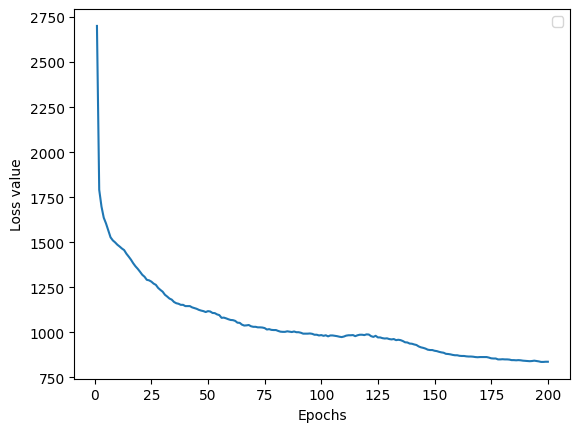

In [6]:
losses = ann.get_losses()

# Plot losses
plt.plot(losses.keys(), losses.values())
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = ann.predict(x_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\n\nAccuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1220   76]
 [ 121 1183]]


Accuracy Score:  0.9242307692307692


In [8]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

cf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix: \n{cf} \n\nAccuracy: {acc}")

Confusion Matrix: 
[[1096  200]
 [ 250 1054]] 

Accuracy: 0.8269230769230769


#### Premade Dataset import

In [54]:
df = pd.read_csv('dry_bean.csv', engine='pyarrow')
x_uci = df.iloc[:, :-1].values
y_uci = df.iloc[:, -1].values

print(f"Type of x: {type(x)}")
print(f"Type of y: {type(y)}")

Type of x: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


In [55]:
pd.DataFrame(y_uci).value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

The target variable needs to be encoded

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_uci = le.fit_transform(y_uci)

pd.DataFrame(y_uci).value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: count, dtype: int64

In [44]:
numbers = [3546, 2636, 2027, 1928, 1630, 1322, 522]
numbers.sort(reverse=True)

group1 = []
group2 = []

for num in numbers:
    if sum(group1) <= sum(group2):
        group1.append(num)
    else:
        group2.append(num)

print("Group 1:", group1, "Sum: ", sum(group1))
print("Group 2:", group2, "Sum: ", sum(group2))


Group 1: [3546, 1928, 1322] Sum:  6796
Group 2: [2636, 2027, 1630, 522] Sum:  6815


The ANN was built with binary classification in mind, so we will group the types of outputs to reduce it to two classes <br>
Classes 3, 4, 0 will be changed to new_class 0 <br>
Classes 1, 2, 5, 6 will be changed to new_class 1

In [58]:
for i in range(len(y_uci)):
    if y_uci[i] in [0, 3, 4]:
        y_uci[i] = 0
    else:
        y_uci[i] = 1
    
pd.DataFrame(y_uci).value_counts()

1    6815
0    6796
Name: count, dtype: int64

Next, Standard Scaler

In [61]:
# Standard scaling on x_uci
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_uci = scaler.fit_transform(x_uci)

In [62]:
n_samples = x_uci.shape[0]
n_features = x_uci.shape[1]
n_classes = 2

x_train, x_test, y_train, y_test = train_test_split(x_uci, y_uci, test_size=0.2, random_state=42)

print(f"Type of x_train: {type(x_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of x_test: {type(x_test)}")
print(f"Type of y_test: {type(y_test)}")

Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of x_test: <class 'numpy.ndarray'>
Type of y_test: <class 'numpy.ndarray'>


In [63]:
np.random.seed(0)
ann = ANN2(x_train.shape[1], int(2/3 * x_train.shape[1]) + 1, 1) # Should be number of columns in input x, number of neurons per hidden layer (arbitrary, and we only have one hidden layer rn), and number of possible outputs (binary classification = 2)

print("Hidden Layer:")
for neuron in ann.network[0]:
    print(len(neuron['weights']), neuron)

print("\nOutput Layer:")
for neuron in ann.network[1]:
    print(len(neuron['weights']), neuron)

losses = ann.train_network(x_train, y_train, l_rate=0.01, n_epoch=200)

Hidden Layer:
17 {'weights': [0.009762700785464956, 0.043037873274483884, 0.02055267521432877, 0.008976636599379376, -0.015269040132219053, 0.029178822613331212, -0.0124825577474615, 0.07835460015641596, 0.09273255210020587, -0.023311696234844456, 0.05834500761653291, 0.005778983950580893, 0.013608912218786462, 0.08511932765853222, -0.08579278836042262, -0.08257414005969187, -0.09595632051193487]}
17 {'weights': [0.0665239691095876, 0.05563135018997009, 0.07400242964936385, 0.0957236684465528, 0.059831712843344736, -0.007704127549413631, 0.0561058352572911, -0.07634511482621337, 0.02798420426550477, -0.07132934251819073, 0.08893378340991678, 0.004369664350014332, -0.017067612001895285, -0.04708887757907461, 0.05484673788684333, -0.008769933556690285, 0.013686789773729696]}
17 {'weights': [-0.09624203991272898, 0.023527099415175418, 0.02241914454448428, 0.02338679937495139, 0.08874961570292483, 0.03636405982069668, -0.028098419885242795, -0.012593609240131712, 0.03952623918545298, -0.08

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


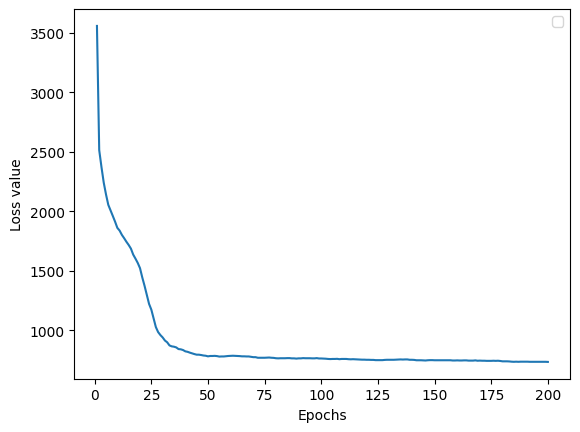

In [64]:
losses = ann.get_losses()

# Plot losses
plt.plot(losses.keys(), losses.values())
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = ann.predict(x_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\n\nAccuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1248   92]
 [  83 1300]]


Accuracy Score:  0.9357326478149101
